# Project: Life Expectancy and GDP

## Project Scope

The goal of this project is to analyze the relationship between the life expectancy and GDP of six countries over a specific period of time. The intention is to generate insights and come up with a conclusion to inform the WHO about whether economic growth enhances, worsens, or does not significantly affect the life expectancy of certain countries. 

The dataset used in this project contains information on the GDP and life expectancy of countries. The following potential steps will be taken to complete the project:

1. Import the dataset and Required Libraries
2. Examine the structure of the dataset
3. Examine the dataset for errors and/ore missing values
4. Understand the dataset
5. Decide on the visualizations used to examine the relationship between GDP and life expectancy at birth. Also, to check how the relationship differs across the sampled countries.
6. Build the visualizations.
7. Write an analysis of the findings and come up with a conclusion which is provided to the WHO.

## Step 1: Import the Dataset and Required Libraries

In [25]:
# Import the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
# Import the data and view the first few rows
data = pd.read_csv('all_data.csv')

## Step 2: Examine the Structure of the Dataset

In [27]:
data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


By viewing the first few rows of the dataset, we can see that it shows the life expectancy at birth and GDP values of different countries throughout the years

In [28]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [9]:
data.shape

(96, 4)

## Examine the Dataset for Errors and/or Missing Values

### Check for Missing Values

In [21]:
data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

The dataset has no missing values for any of the columns.

### Check the Unique Values of the Countries and Years Columns

In [12]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [13]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

### Understanding the Dataset

The dataset contains information on 6 countries with the average life expectancy between 2000 and 2015 (16 years). The average life expectancy at birth across the 6 countries and over the studied time period is 72.78 while the median is 76.75. The median and mean are not equal but also not severely different thus the distribution is slightly skewed to the left (as per the histogram below).

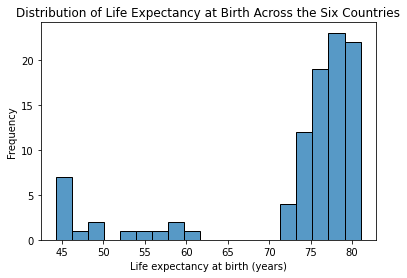

In [31]:
sns.histplot(data['Life expectancy at birth (years)'])
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at Birth Across the Six Countries')
plt.show()

The average GDP is about 3.8e12 but with high variance. The histogram below shows that the distribution is heavily skewed to the right as most countries have a lower GDP. 

<AxesSubplot:xlabel='GDP', ylabel='Count'>

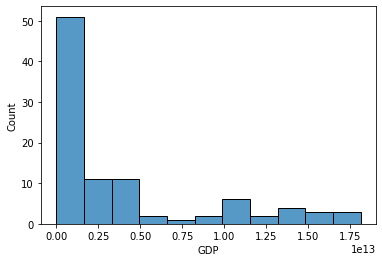

In [29]:
sns.histplot(data['GDP'])

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


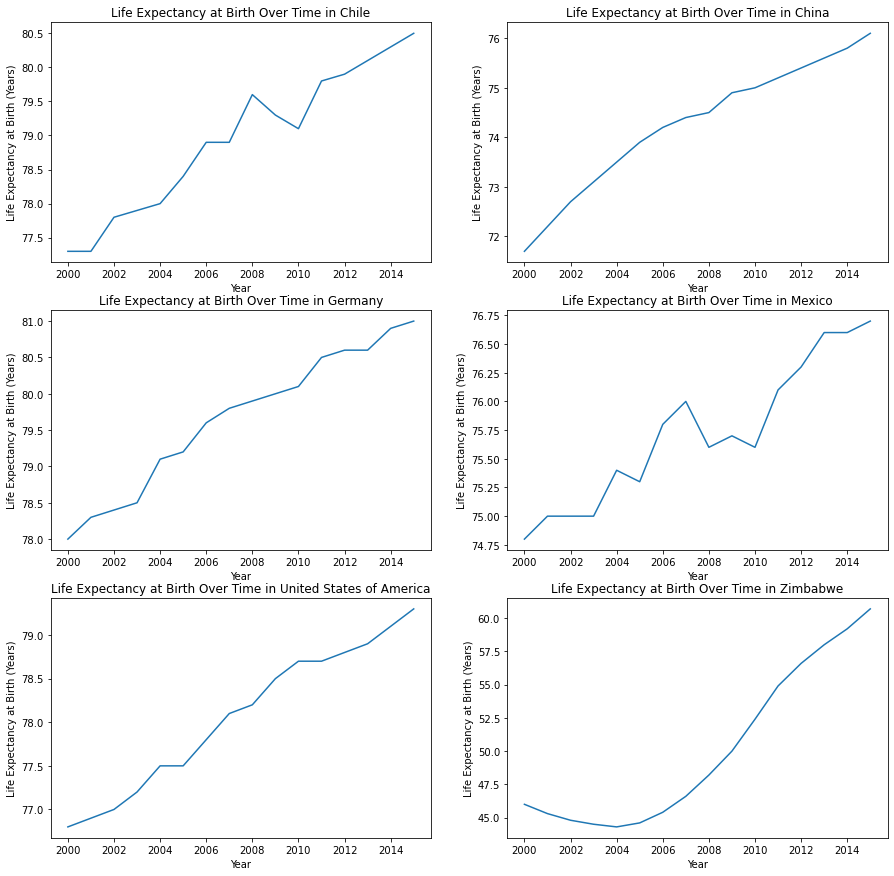

In [65]:
plt.figure(figsize=(15,15))
list_1 = list(range(1,7))
list_2 = list(data.Country.unique())
print(list_2)
for i, country in zip(list_1, list_2):
    plt.subplot(3,2,i)
    plt.plot(data.Year[data.Country == country], 
             data['Life expectancy at birth (years)'][data.Country == country])
    plt.title(f"Life Expectancy at Birth Over Time in {country}")
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy at Birth (Years)')
        

From the plots above, we can see that life expectancy has experienced a steady increase in China, Germany, and the United States of America. Zimbabwe, Chile, and Mexico saw a few drops over the years. This provides some evidence that countries with higher GDPs have a more consistent increase in life expectancy over time.

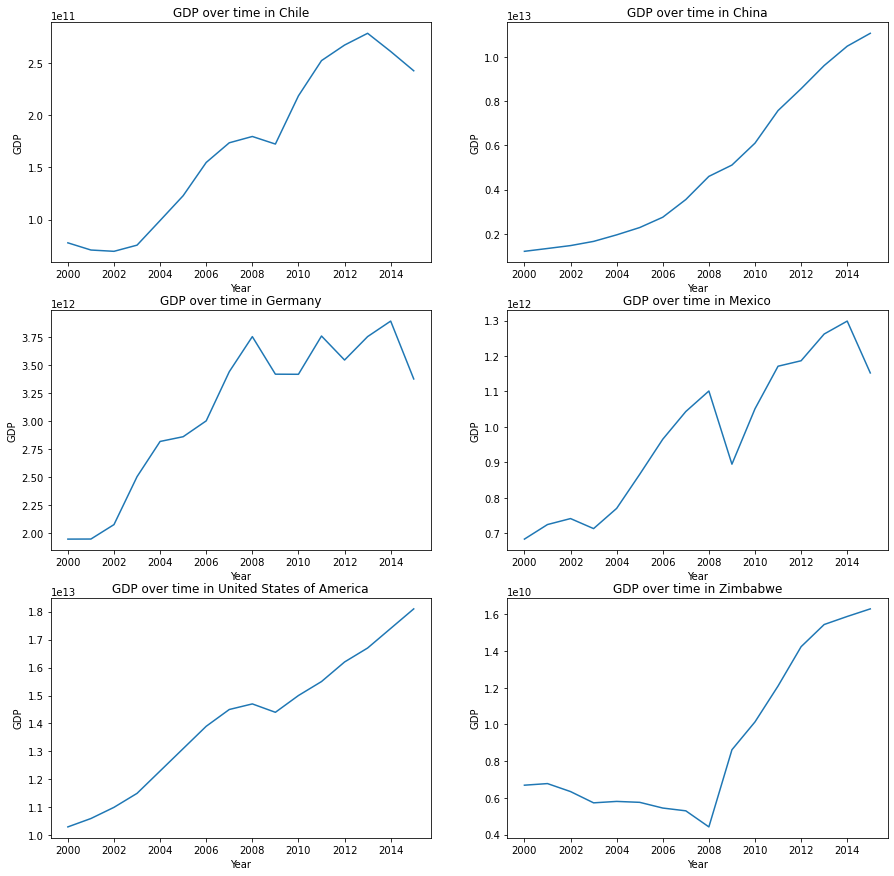

In [68]:
plt.figure(figsize = (15,15))
for i,country in zip(list_1, list_2):
    plt.subplot(3,2,i)
    plt.plot(data.Year[data.Country == country],
             data.GDP[data.Country == country])
    plt.title(f'GDP over time in {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP')

Linking this observation to the plots of life expectancy (seen earlier), we can see that the GDPs of USA, Germany, and China have increased relatively steadily over the years. On the contrary, other nations (Zimbabwe, Chile, and Mexico) had much more fluctuations in GDP between 2000 and 2015. 

### Decide on the Visualizations to Examine the Relationship between GDP and Life Expectancy at Birth

In this project, we are trying to find a relationship between two quantitative variables associated with different countries. We also have the variable of time that could be taken into consideration. A good option would be to have a grid of scatter plots that shows the relationship between the two variables. 

In [117]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Text(0.5, 1.0, 'Life Expectancy vs GDP in Zimbabwe')

<Figure size 1080x1080 with 0 Axes>

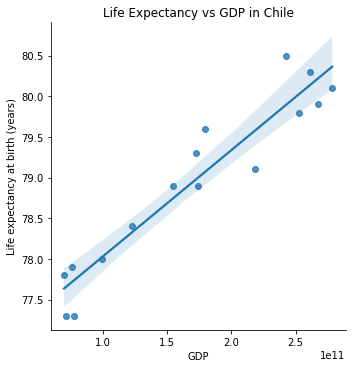

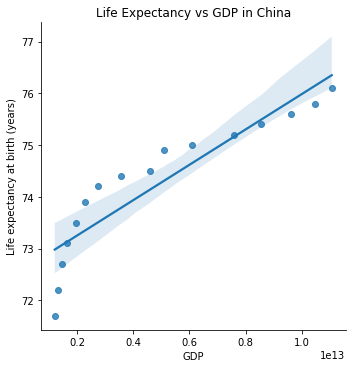

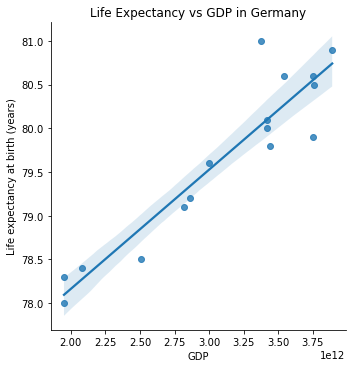

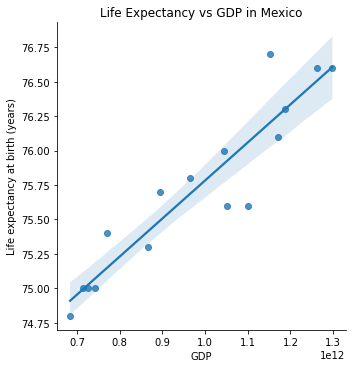

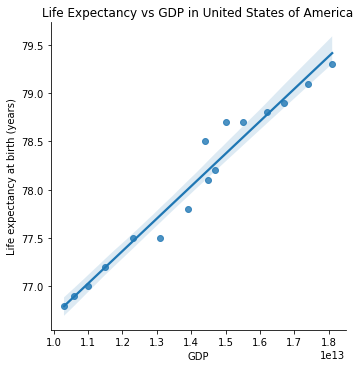

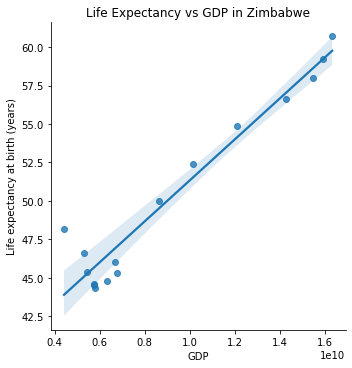

In [119]:
plt.figure(figsize=(15,15))
sns.lmplot(data=data[data.Country == "Chile"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in Chile')
sns.lmplot(data=data[data.Country == "China"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in China') 
sns.lmplot(data=data[data.Country == "Germany"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in Germany') 
sns.lmplot(data=data[data.Country == "Mexico"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in Mexico') 
sns.lmplot(data=data[data.Country == "United States of America"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in United States of America') 
sns.lmplot(data=data[data.Country == "Zimbabwe"], x='GDP', y = 'Life expectancy at birth (years)')
plt.title('Life Expectancy vs GDP in Zimbabwe') 

The plots above show us that the two variables are clearly positively correlated. However, the relationship is strongest in the developed economies such as the United States of America and Germany. Therefore, in general, economic growth increases a country's life expectancy at birth.

In [147]:
correlations = pd.DataFrame()
for country in data.Country.unique():
    new_row = {'Country':country, 
               'Correlation':data.GDP[data.Country == country].corr(
               data['Life expectancy at birth (years)'][data.Country == country])}
    correlations = correlations.append(new_row, ignore_index= True)
correlations

C:\Users\ahmad\AppData\Local\Temp/ipykernel_872/3066025568.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations = correlations.append(new_row, ignore_index= True)
C:\Users\ahmad\AppData\Local\Temp/ipykernel_872/3066025568.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations = correlations.append(new_row, ignore_index= True)
C:\Users\ahmad\AppData\Local\Temp/ipykernel_872/3066025568.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations = correlations.append(new_row, ignore_index= True)
C:\Users\ahmad\AppData\Local\Temp/ipykernel_872/3066025568.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlat

,Country,Correlation
0,Chile,0.949877
1,China,0.908526
2,Germany,0.932699
3,Mexico,0.932238
4,United States of America,0.981709
5,Zimbabwe,0.966200


The table of correlation values above also provides strong evidence of the positive relationship between GDP and the life expectancy at birth in each of the six sampled countries. We can conclude that nations can rely on economic development to increase the life expectancy of their population. Investments into the healthcare sector which come at higher levels of income have benefits in protecting a population and increasing its productivity.